<h1>Image Classification</h1>


<h2>GrayScale Data</h2>


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 8])
sns.set_style('darkgrid')

<Figure size 1200x800 with 0 Axes>

In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image = x_train[0]

single_image.shape

(28, 28)

In [12]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

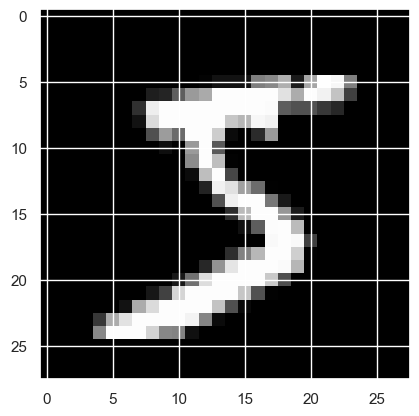

In [15]:
plt.imshow(single_image, cmap='gray')

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train.shape

(60000,)

In [20]:
y_example = to_categorical(y_train)

In [21]:
y_example.shape

(60000, 10)

In [23]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_cat_test = to_categorical(y_test, num_classes=10)

y_cat_test.shape

(10000, 10)

In [25]:
y_cat_train = to_categorical(y_train, num_classes=10)

y_cat_train.shape

(60000, 10)

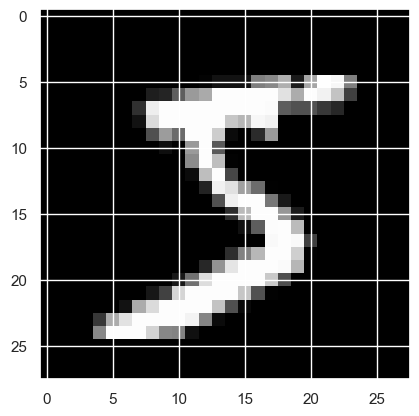

In [28]:
plt.imshow(single_image, cmap='gray')

In [29]:
single_image.max()

255

In [30]:
single_image.min()

0

In [31]:
x_train = x_train / 255
x_test = x_test / 255

In [34]:
scaled_image = x_train[0]

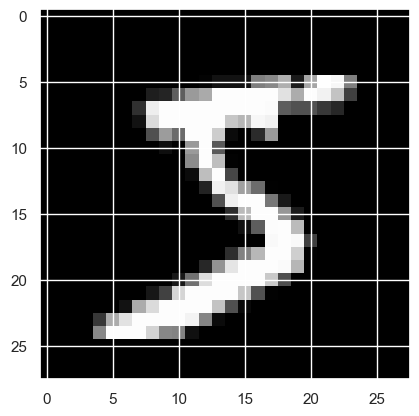

In [35]:
plt.imshow(scaled_image, cmap='gray')

In [36]:
scaled_image.max()

1.0

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [39]:
x_train.shape

(60000, 28, 28, 1)

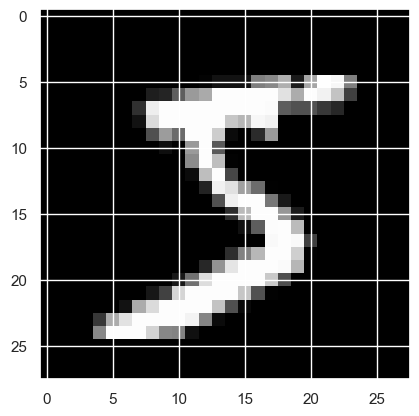

In [42]:
plt.imshow(x_train[0], cmap='gray')

In [44]:
x_test.shape

(10000, 28, 28)

In [45]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4),
          input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# OUTPUT LAYER SOFTMAX --> MULTI CLASS
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [52]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(
    x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10


2024-03-10 09:57:28.729101: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 42s 22ms/step - loss: 0.1384 - accuracy: 0.9570 - val_loss: 0.0588 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0437 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0537 - val_accuracy: 0.9832


In [55]:
metrics = pd.DataFrame(model.history.history)

metrics

,loss,accuracy,val_loss,val_accuracy
0,0.138434,0.956983,0.058774,0.9798
1,0.047565,0.985667,0.043730,0.9851
2,0.030636,0.990683,0.053738,0.9832


<Axes: >

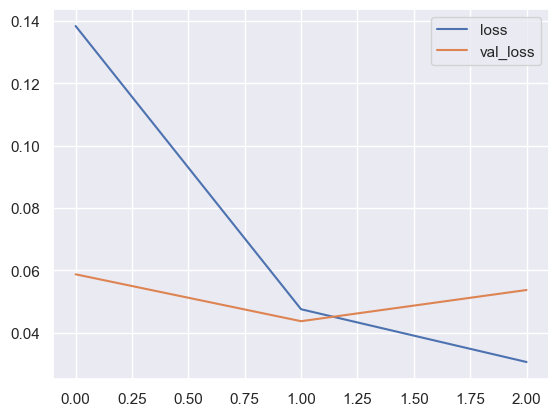

In [56]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

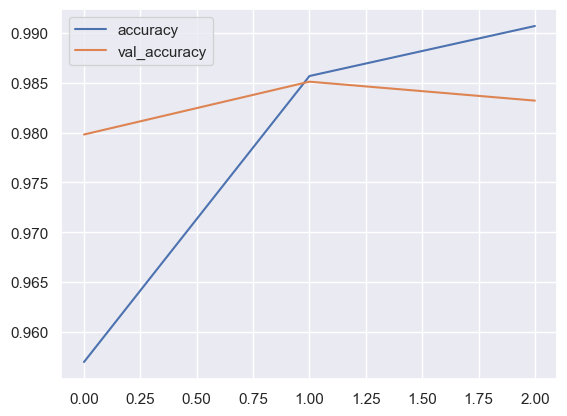

In [58]:
metrics[['accuracy', 'val_accuracy']].plot()

In [59]:
model.metrics_names

['loss', 'accuracy']

In [61]:
model.evaluate(x_test, y_cat_test, verbose=2)

313/313 - 1s - loss: 0.0537 - accuracy: 0.9832 - 1s/epoch - 4ms/step


[0.053738489747047424, 0.9832000136375427]

In [62]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [64]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 6ms/step


In [65]:
y_cat_test.shape

(10000, 10)

In [66]:
y_test.shape

(10000,)

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.96      1.00      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.97      0.98       974
           9       1.00      0.93      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [68]:
confusion_matrix(y_test, predictions)

array([[ 976,    0,    1,    1,    0,    1,    1,    0,    0,    0],
       [   3, 1128,    2,    0,    0,    0,    2,    0,    0,    0],
       [   1,    2, 1027,    0,    0,    0,    1,    1,    0,    0],
       [   0,    0,    3, 1001,    0,    5,    0,    0,    1,    0],
       [   1,    0,    0,    0,  980,    0,    1,    0,    0,    0],
       [   1,    0,    0,    5,    0,  882,    3,    0,    1,    0],
       [   1,    2,    0,    0,    1,    1,  953,    0,    0,    0],
       [   0,    3,   10,    4,    2,    1,    0, 1007,    1,    0],
       [   6,    2,    4,    4,    2,    4,    7,    1,  942,    2],
       [   3,    6,    2,    8,   34,   13,    1,    6,    0,  936]])

<Axes: >

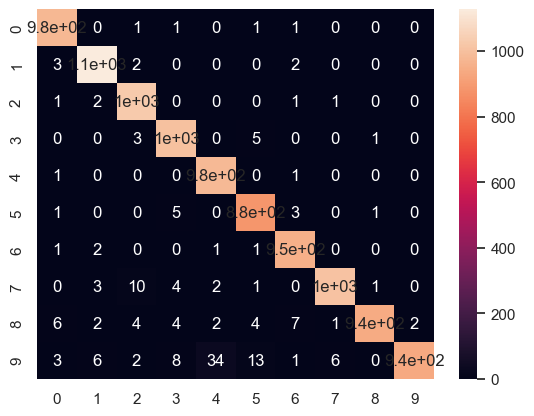

In [71]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

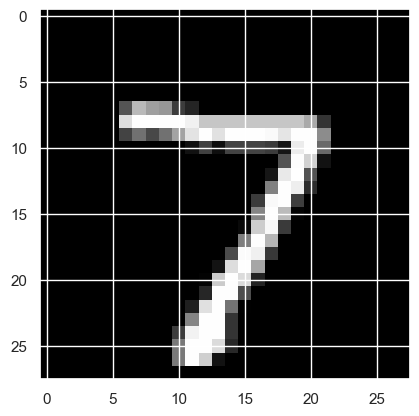

In [74]:
my_number = x_test[0]

plt.imshow(my_number.reshape(28, 28), cmap='gray')

In [76]:
model.predict(my_number.reshape(1, 28, 28, 1))
my_number = np.argmax(my_number, axis=1)

1/1 [==============================] - 0s 49ms/step


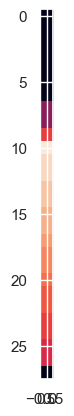

In [78]:
plt.imshow(my_number)

<h2>Color Data</h2>
